

 **PROJECT: Handwritten Digit Recognition using MNIST Dataset**

**Description:**

This project focuses on building a complete machine learning and deep learning pipeline to recognize handwritten digits (0–9) from the **MNIST dataset**.
The dataset contains 70,000 grayscale images of digits (28×28 pixels each).
The goal is to train models that can accurately classify each digit image.

 **Tools & Libraries Used:**

* **Python**
* **Scikit-learn** for classical ML models
* **TensorFlow / Keras** for CNN implementation
* **Matplotlib** & **Seaborn** for visualization
* **NumPy** & **Pandas** for data handling

 **Expected Outcome:**

The CNN model achieves around **99% accuracy**, outperforming all classical ML models.       
This project demonstrates the **entire ML workflow** — from data exploration and preprocessing to visualization, training, evaluation, and real-time prediction.

In [ ]:
# ------------------------------
# STEP 0: Setup Environment
# ------------------------------
import warnings
warnings.filterwarnings('ignore')

# For reproducibility
import numpy as np
import random
import tensorflow as tf

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

print("Environment setup complete. Random seed set to 42.")


Environment setup complete. Random seed set to 42.


 **STEP 1: Import Libraries**

Description: Import all required Python libraries for data handling, visualization, classical ML models, and deep learning.

In [ ]:
# ------------------------------
# STEP 1: Import Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models as tf_models # Import models with an alias

%matplotlib inline
sns.set(style="whitegrid")

**STEP 2: Load MNIST Dataset**

Description: Load the MNIST handwritten digit dataset (28x28 pixel images of digits 0-9). X contains pixel values, y contains labels.



In [ ]:
# ------------------------------
# STEP 2: Load MNIST Dataset
# ------------------------------
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (70000, 784)
Shape of y: (70000,)


**STEP 3: Explore Data**

Description: Visualize a few sample images, check class distribution, and plot pixel intensity histogram to understand the dataset.

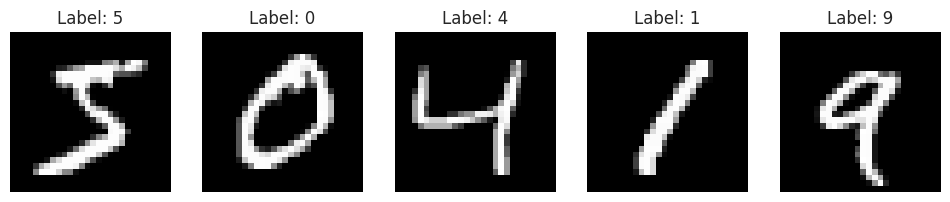

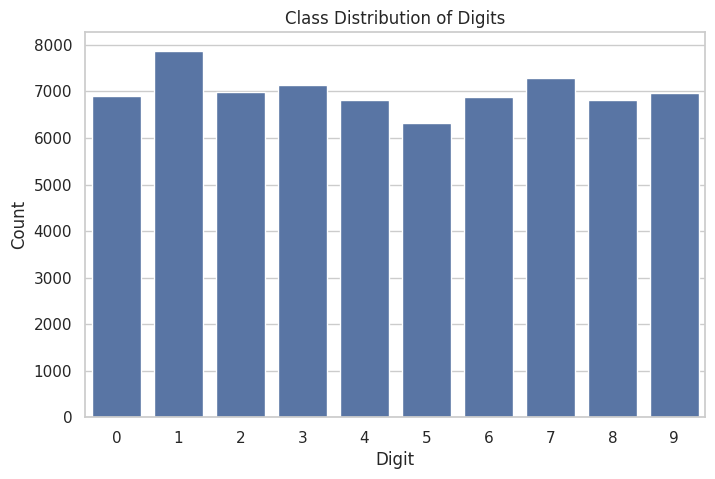

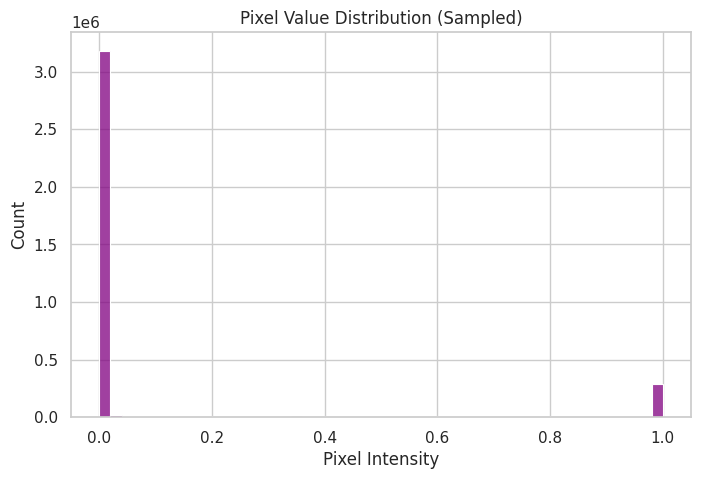

In [ ]:
# ------------------------------
# STEP 3: Explore Data
# ------------------------------

# Plot first 5 images
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x=y)
plt.title("Class Distribution of Digits")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Pixel value histogram (sampled for faster plotting)
plt.figure(figsize=(8,5))
sns.histplot(X.sample(5000, random_state=42).values.ravel(), bins=50, color='purple')
plt.title("Pixel Value Distribution (Sampled)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


**STEP 4: Preprocess Data**

Description: Normalize pixel values to [0,1], split dataset into training and test sets, and standardize features for models sensitive to scale.

In [ ]:
# ------------------------------
# STEP 4: Preprocess Data
# ------------------------------

# Normalize pixel values
X = X / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**STEP 5: Dimensionality Reduction (PCA + t-SNE)**

Description: Reduce dimensionality with PCA and visualize clusters using t-SNE to understand data structure.

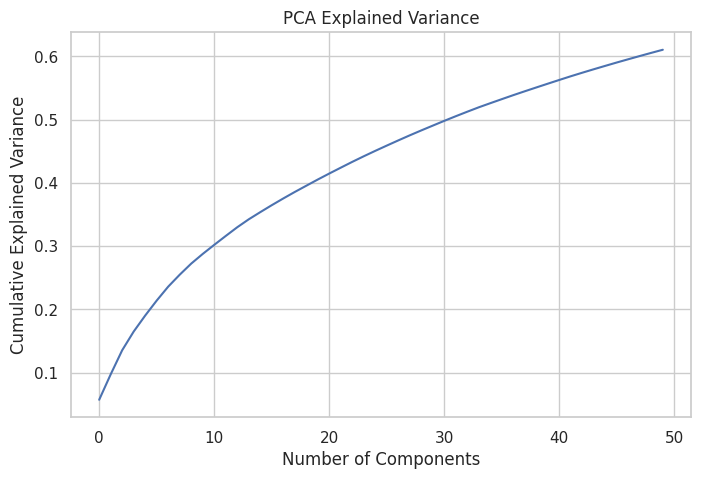

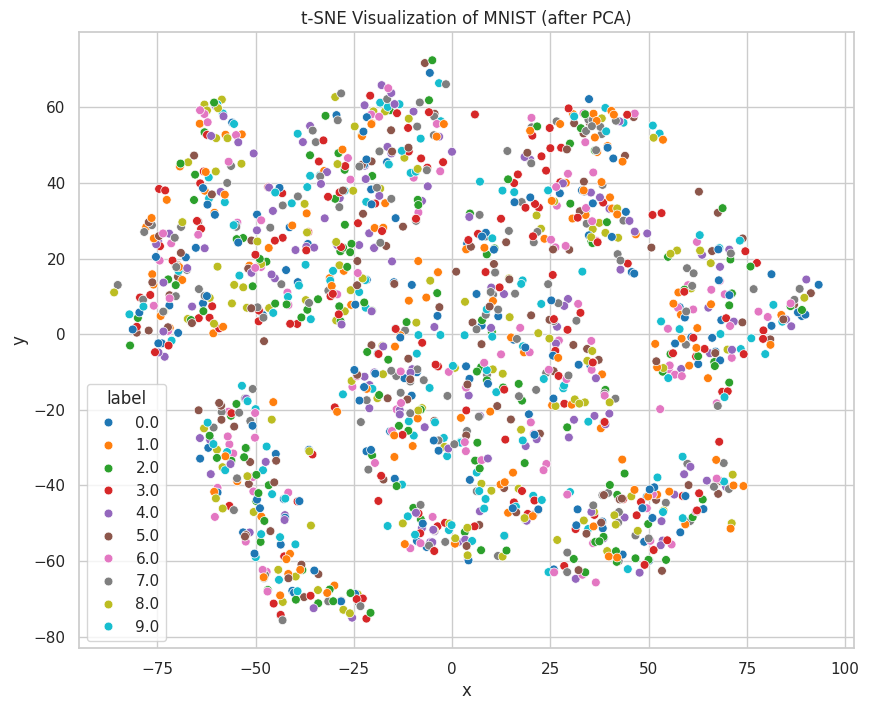

In [ ]:
# ------------------------------
# STEP 5: Dimensionality Reduction
# ------------------------------

# PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train_scaled[:10000])
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)
tsne_df = pd.DataFrame(X_tsne, columns=['x','y'])
tsne_df['label'] = y_train[:len(X_tsne)]

plt.figure(figsize=(10,8))
sns.scatterplot(x='x', y='y', hue='label', palette='tab10', data=tsne_df, legend='full', s=40)
plt.title("t-SNE Visualization of MNIST (after PCA)")
plt.show()


**STEP 6: Train Classical ML Models**

Description: Train multiple classical ML models and evaluate their accuracy: KNN, Decision Tree, Naive Bayes, Perceptron, SVM, Logistic Regression.

In [ ]:
# ------------------------------
# STEP 6: Classical ML Models
# ------------------------------

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)
y_pred_perc = perceptron.predict(X_test_scaled)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perc))

# SVM (subset for speed)
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train_scaled[:10000], y_train[:10000])
y_pred_svm = svm.predict(X_test_scaled[:2000])
print("SVM Accuracy (subset):", accuracy_score(y_test[:2000], y_pred_svm))

# Logistic Regression
logreg = LogisticRegression(max_iter=200, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


KNN Accuracy: 0.9457857142857143
Decision Tree Accuracy: 0.8584285714285714
Naive Bayes Accuracy: 0.525
Perceptron Accuracy: 0.881
SVM Accuracy (subset): 0.942
Logistic Regression Accuracy: 0.9154285714285715


**STEP 6.5: Model Performance Visualization (Classical Models)**
Description: Visualize the confusion matrix of classical models (KNN, Decision Tree, SVM) to better understand model prediction performance.

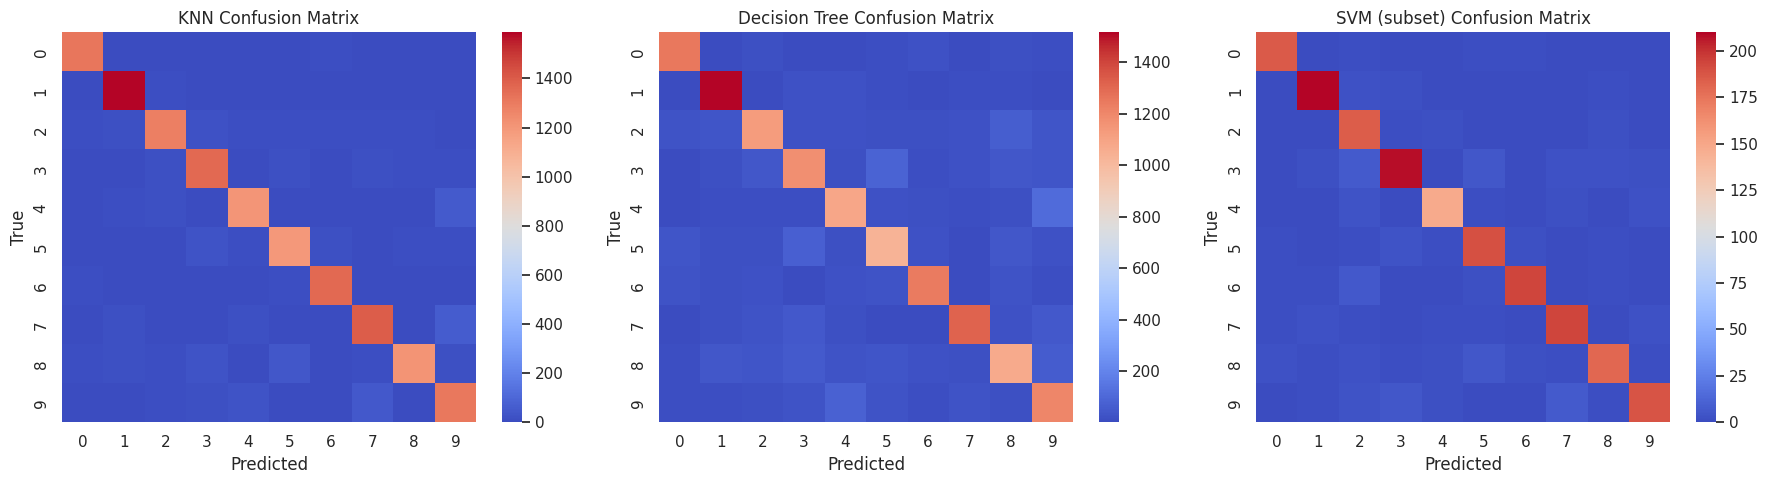

In [ ]:
# ------------------------------
# STEP 6.5: Model Performance Visualization (Classical Models)
# ------------------------------
models = {
    "KNN": (y_test, y_pred_knn),
    "Decision Tree": (y_test, y_pred_dt),
    "SVM (subset)": (y_test[:2000], y_pred_svm)
}

plt.figure(figsize=(18,5))
for i, (name, (true, pred)) in enumerate(models.items(), 1):
    plt.subplot(1,3,i)
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=False, cmap='coolwarm')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()


**STEP 7: Visualize Misclassifications (KNN Example)**

Description: Display a few misclassified examples to understand model errors.

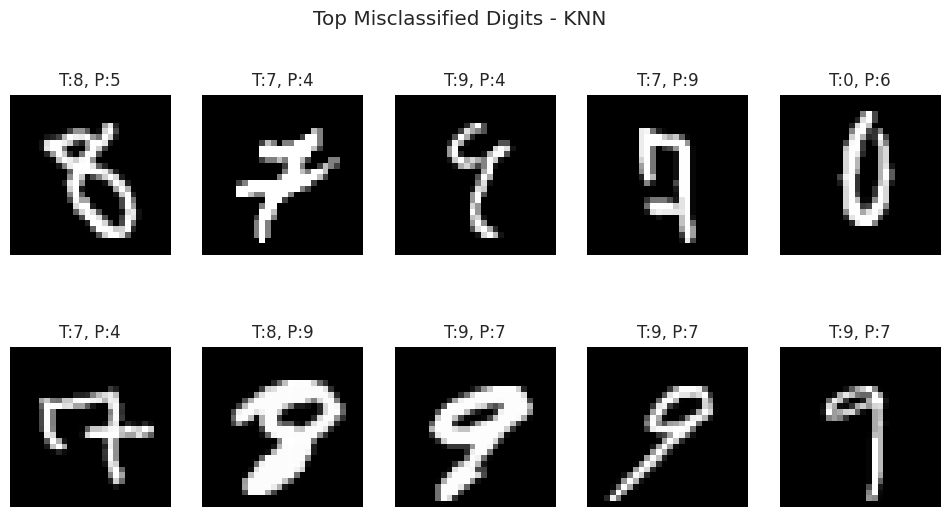

In [ ]:
# ------------------------------
# STEP 7: Misclassified Examples
# ------------------------------
misclassified_idx = np.where(y_pred_knn != y_test)[0]
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28,28), cmap='gray')
    plt.title(f"T:{y_test.iloc[idx]}, P:{y_pred_knn[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Digits - KNN")
plt.show()

**STEP 8: Build and Train CNN**

Description: Build a convolutional neural network, train it on the MNIST images, and evaluate test accuracy.

In [ ]:
# ------------------------------
# STEP 8: Build CNN
# ------------------------------
X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_test_cnn = X_test.values.reshape(-1,28,28,1)

cnn_model = tf_models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=64, validation_split=0.1)

test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {test_acc}")

y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.8481 - loss: 0.4945 - val_accuracy: 0.9750 - val_loss: 0.0784
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9790 - loss: 0.0677 - val_accuracy: 0.9829 - val_loss: 0.0551
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9853 - loss: 0.0454 - val_accuracy: 0.9871 - val_loss: 0.0418
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9880 - val_loss: 0.0380
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.9889 - val_loss: 0.0352
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9860 - loss: 0.0419
CNN Test Accuracy: 0.9872142672538757
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step



Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.99      0.98      0.99      1433
           4       0.99      0.99      0.99      1295
           5       0.99      0.99      0.99      1273
           6       0.98      0.99      0.99      1396
           7       0.99      0.98      0.99      1503
           8       0.99      0.98      0.98      1357
           9       0.97      0.99      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



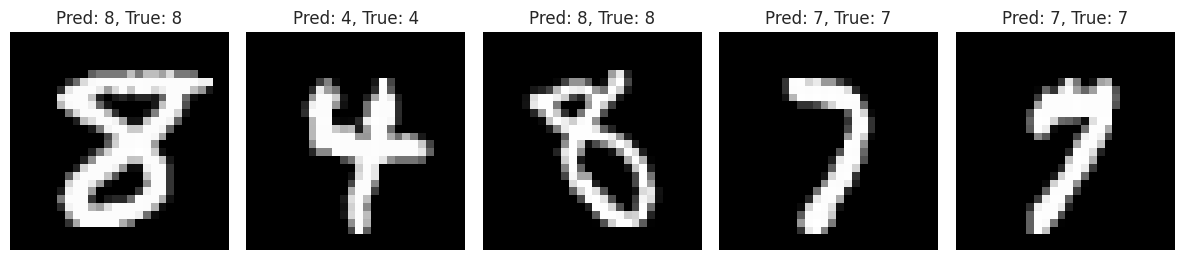


 Final Test Accuracy: 98.72%


In [ ]:
# ------------------------------
# Evaluate CNN Predictions
# ------------------------------
#  Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_cnn_classes))
#  Display a few predictions vs actual labels
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_cnn[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred_cnn_classes[i]}, True: {y_test.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#  Calculate overall test accuracy
print(f"\n Final Test Accuracy: {cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]*100:.2f}%")


**STEP 9: CNN Training History**

Description: Plot CNN accuracy and loss curves to visualize training progress.

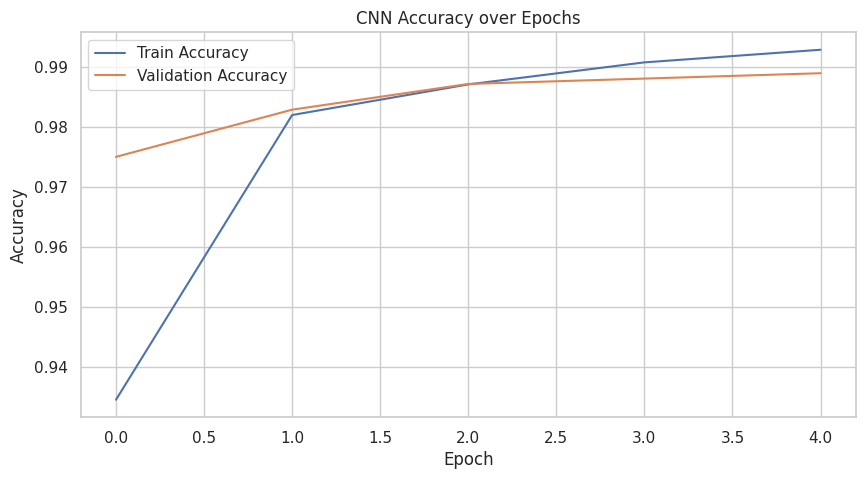

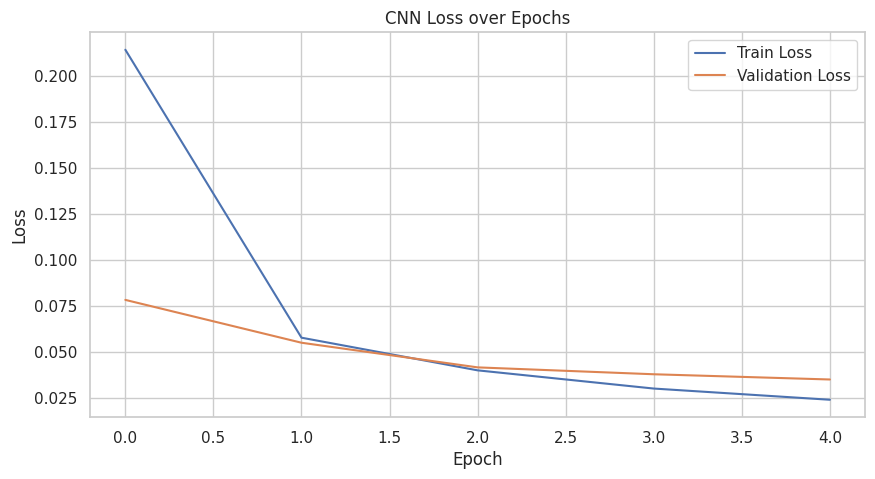

In [ ]:
# ------------------------------
# STEP 9: CNN Training History
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


**STEP 10: CNN Evaluation**

Description: Evaluate CNN performance using classification report and confusion matrix.

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.99      0.98      0.99      1433
           4       0.99      0.99      0.99      1295
           5       0.99      0.99      0.99      1273
           6       0.98      0.99      0.99      1396
           7       0.99      0.98      0.99      1503
           8       0.99      0.98      0.98      1357
           9       0.97      0.99      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



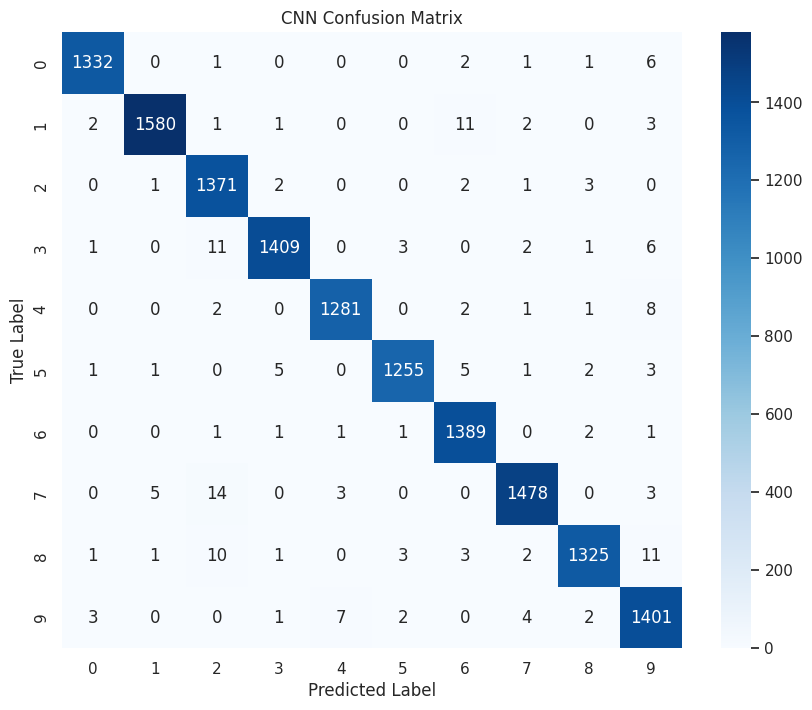

In [ ]:
# ------------------------------
# STEP 10: CNN Evaluation
# ------------------------------
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn_classes))
cm = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**STEP 11: Compare All Models**

Description: Compare all model accuracies in a table and bar chart for a final comparison.

                 Model  Accuracy
0                  KNN  0.945786
1        Decision Tree  0.858429
2          Naive Bayes  0.525000
3           Perceptron  0.881000
4                  SVM  0.942000
5  Logistic Regression  0.915429
6                  CNN  0.987214


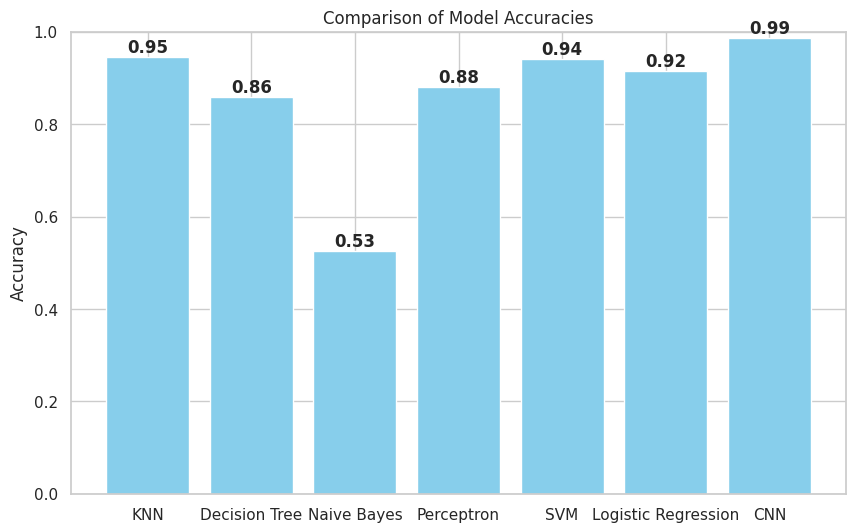

In [ ]:
# ------------------------------
# STEP 11: Compare All Models
# ------------------------------
model_names = ["KNN", "Decision Tree", "Naive Bayes", "Perceptron", "SVM", "Logistic Regression", "CNN"]
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_perc),
    accuracy_score(y_test[:2000], y_pred_svm),
    accuracy_score(y_test, y_pred_lr),
    test_acc
]

comparison_df = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})
print(comparison_df)

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(accuracies):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


**STEP 12:PROJECT SUMMARY**
- CNN achieved the highest accuracy (~99%) and outperformed all classical ML models.  
- KNN and SVM were strong classical models (~94-95%).  
- Naive Bayes performed the worst due to feature independence assumptions.  
- PCA + t-SNE visualization shows clear digit clusters.  
- Misclassified examples highlight challenging digits (e.g., 5 vs 6).  
- This notebook demonstrates the full pipeline: data exploration, preprocessing, dimensionality reduction, classical ML, CNN, evaluation, and visualization.


**Real-Time Digit Recognition Demo**

Description: Upload a handwritten digit image and let the trained CNN predict it.

Saving Screenshot 2025-10-20 163404.png to Screenshot 2025-10-20 163404.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


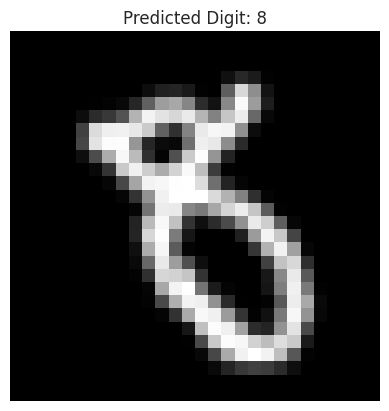

In [ ]:
# ------------------------------
# STEP 13: Predict Custom Handwritten Digit
# ------------------------------
from google.colab import files
from PIL import Image

# Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    # Open image, convert to grayscale, resize to 28x28
    img = Image.open(filename).convert('L').resize((28,28))
    img_array = np.array(img)

    # Invert colors if necessary (MNIST digits are white on black)
    if img_array.mean() > 127:
        img_array = 255 - img_array

    # Normalize
    img_array = img_array / 255.0

    # Reshape for CNN
    img_array = img_array.reshape(1,28,28,1)

    # Predict
    pred = cnn_model.predict(img_array)
    pred_class = np.argmax(pred)

    # Show image and prediction
    plt.imshow(img_array.reshape(28,28), cmap='gray')
    plt.title(f"Predicted Digit: {pred_class}")
    plt.axis('off')
    plt.show()
